# ***Predictive Quality in Additive Manufacturing***

Week 1: Data exploration
 Which structure has the production system? Are all features present for all products?
 Which product clusters can be identified based on the existence of features? Do features
 correlate? Are there outliers in the features?

## Data import and visualization

All necessary packages 

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import matplotlib.patches as mpatches


In [ ]:
# change data_path according to the path of data
current_path = os.getcwd()
print("current pth:", current_path)
#data_path = os.path.dirname(current_path)
if os.path.exists("02_Data"):
    data_path = ("02_Data")
    print("Data has been founded at:", data_path)
else:
    print("Can`t find Data")
Audio_path = os.path.join(data_path,"01_Audio")
#print("Audio:", Audio_path)
Audio_files = [ f for f in os.listdir(Audio_path) if f.endswith(".csv")]
print("Audio_files are: ", Audio_files)
list_Audio = []
id_Audio = []
for file_name in Audio_files:
    file_path = os.path.join(Audio_path,file_name)
    df = pd.read_csv(file_path)
    list_Audio.append(df)
    id_Audio.append(int(os.path.splitext(os.path.basename(file_path))[0]))
print("Audio_len: ",len(list_Audio))
print("shape of list_Audio:", list_Audio[0].shape) 
#df_Audio = pd.concat(list_Audio, ignore_index=True)
#print(list_Audio[0].head())

Weldqas_path = os.path.join(data_path,"02_Weldqas")
Weldqas_files = [ j for j in os.listdir(Weldqas_path) if j.endswith(".csv")]
print("Weldqas_files are: ", Weldqas_files)
list_Weldqas = []
id_weldqas = []
for file_name in Weldqas_files:
    file_path = os.path.join(Weldqas_path,file_name)
    df = pd.read_csv(file_path)
    list_Weldqas.append(df)
    id_weldqas.append(int(os.path.splitext(os.path.basename(file_path))[0]))
print("Weldqas_len: ",len(list_Weldqas))
print("shape of list_Weldqas:", list_Weldqas[0].shape) 
#df_Weldqas = pd.concat(list_Weldqas, ignore_index=True)
#print(df_Weldqas.head())

##get the path o excel
excel_paths = []
for root, dirs, files in os.walk(data_path):
    for file in files:
        if file.endswith(".xlsx"):
            excel_paths.append(os.path.join(data_path,file))
print(excel_paths)

#combine data
df_audio_all = pd.concat(list_Audio, keys=id_Audio, names=["MeasurementID"])
df_weld_all = pd.concat(list_Weldqas, keys=id_weldqas, names=["MeasurementID"])




current pth: /Users/jasminruscher/Desktop/KI in der Produktion/Predictive-Quality-in-Additive-Manufacturing
Data has been founded at: 02_Data
Audio_files are:  ['223.csv', '237.csv', '169.csv', '196.csv', '182.csv', '357.csv', '343.csv', '425.csv', '419.csv', '394.csv', '380.csv', '381.csv', '395.csv', '418.csv', '342.csv', '424.csv', '356.csv', '183.csv', '197.csv', '236.csv', '222.csv', '234.csv', '220.csv', '208.csv', '181.csv', '195.csv', '426.csv', '340.csv', '354.csv', '368.csv', '383.csv', '397.csv', '396.csv', '382.csv', '369.csv', '355.csv', '427.csv', '341.csv', '194.csv', '180.csv', '209.csv', '221.csv', '235.csv', '219.csv', '231.csv', '225.csv', '184.csv', '190.csv', '379.csv', '345.csv', '423.csv', '351.csv', '386.csv', '392.csv', '393.csv', '387.csv', '350.csv', '344.csv', '422.csv', '378.csv', '191.csv', '185.csv', '224.csv', '230.csv', '218.csv', '226.csv', '232.csv', '178.csv', '193.csv', '187.csv', '408.csv', '352.csv', '420.csv', '346.csv', '391.csv', '385.csv', '38

In [14]:
#General Information
general = pd.read_csv("./02_Data/0001_Database.csv", sep=';', encoding='latin1')
print("General columns:", general.columns)

print("# iO:", (general['Dataset'] == 'iO').sum())
print("# niO:", (general['Dataset'] == 'niO').sum())
no_audio = general[general['Audio'] == 'No']
audio = general[general['Audio'] == 'Yes']
list_audio_check = audio['Number of Measurement'].tolist()
list_no_audio = no_audio['Number of Measurement'].tolist()
print(f"{len(no_audio)} have no audio data:", list_no_audio)
print("fault type oil:", (general['Forced Error Type'] == 'oil').sum())
print("fault type offset:", (general['Forced Error Type'] == 'offset').sum())
print("fault type Tilt:", (general['Forced Error Type'] == 'Tilt').sum())

#Additional Audio data since Audio_len:  201 != 60 have no audio data:

audio_filenames = [os.path.splitext(f)[0] for f in Audio_files]  # e.g., ['169', '170', ...]
for measurement in list_no_audio:
    if str(measurement) in audio_filenames:
        print(f"Audio data for experiment {measurement} is available.")

for measurement in list_audio_check:
    if str(measurement) not in audio_filenames:
        print(f"Audio data for experiment {measurement} is NOT available.")

excel_df = pd.read_excel(excel_paths[0], sheet_name=0,skiprows=10)
print(excel_df.columns)
df_Usage = excel_df[["Number of Measurement",'Dataset']]
print(df_Usage)
print(id_Audio)

missing_audio = [str(m) for m in list_audio_check if str(m) not in audio_filenames]
extra_audio = [f for f in audio_filenames if int(f) not in list_audio_check]

print(f"{len(missing_audio)} expected audio files missing: {missing_audio}")
print(f"{len(extra_audio)} audio files with no reference in metadata: {extra_audio}")



General columns: Index(['Number of Measurement', 'Experiment', 'Process', 'Usable', 'Dataset',
       'Audio', 'Currency I [A]', 'Time [ms]', 'Eintauchma§ p [mm]',
       'Hub h [mm]', 'Forced Error Type', 'Coaxial Offset [mm]', 'Tilt [¡]',
       'Notes'],
      dtype='object')
# iO: 50
# niO: 210
60 have no audio data: [259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 318, 374]
fault type oil: 50
fault type offset: 80
fault type Tilt: 80
Audio data for experiment 318 is available.
Index(['Unnamed: 0', 'Number of Measurement', 'Experiment', 'Process',
       'Usable', 'Dataset', 'Audio', 'Currency I [A]', 'Time [ms]',
       'Eintauchmaß p [mm]', 'Hub h [mm]', 'Forced Error Type',
       'Coaxial Offset [mm]', 'Tilt [°]', 'Notes'],
      dtype='obj

### Audio part

In [ ]:
import numpy as np
from scipy.stats import skew, kurtosis
from scipy.fft import fft
from scipy.signal import welch

def extract_features(df):
    signal = df["M"].values
    features = {}
    
    # Basic Stats
    features['mean'] = np.mean(signal)
    features['std'] = np.std(signal)
    features['rms'] = np.sqrt(np.mean(signal**2))
    features['min'] = np.min(signal)
    features['max'] = np.max(signal)
    features['skew'] = skew(signal)
    features['kurtosis'] = kurtosis(signal)
    
    # Energy
    #features['energy'] = np.sum(signal ** 2)
    
    # Zero Crossing Rate
    #features['zero_crossings'] = np.sum(np.diff(np.sign(signal)) != 0) / len(signal)
    
    # Frequency Domain (FFT)
    fft = np.fft.fft(signal)
    fft_coeffs = np.abs(fft)[:len(fft)//2]  # Take the positive frequencies
    features['fft_mean'] = np.mean(fft_coeffs)
    features['fft_std'] = np.std(fft_coeffs)
    features['fft_max'] = np.max(fft_coeffs)
    
    # Power Spectral Density (Welch)
    #freqs, psd = welch(signal)
    #features['psd_mean'] = np.mean(psd)
    #features['psd_max'] = np.max(psd)
    
    return features


all_features = []
for df in list_Audio:
    feats = extract_features(df)
    all_features.append(feats)

df_features = pd.DataFrame(all_features)
print(df_features.head())

# Visualize the features

for feature_name in df_features.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(range(len(df_features)), df_features[feature_name])
    plt.title(f'{feature_name} across measurements')
    plt.xlabel('Measurement ID')
    plt.ylabel(feature_name)
    plt.tight_layout()
    plt.show()

   audio_mean    audio_std  audio_min  audio_max  audio_skew  audio_kurtosis  \
0   -0.219845  1752.045732     -23660      24429    0.147705       73.408397   
1    0.556327  1796.774026     -23180      25018    0.108645       69.517411   
2   -0.011418  1485.917267     -23634      23647    0.438475      108.788009   
3    0.133556  1722.156287     -23887      24481   -0.063951       80.215373   
4   -0.208143  1773.298485     -24968      24385    0.529681       76.990550   

   audio_fft_mean  audio_fft_std  audio_fft_max  Number of Measurement Dataset  
0   515124.226007   1.480789e+06   6.638255e+07                    223      iO  
1   510050.209113   1.477462e+06   6.836476e+07                    237      iO  
2   450211.445794   1.433084e+06   7.328375e+07                    169      iO  
3   532537.338214   1.527842e+06   7.701991e+07                    196     niO  
4   439370.886073   1.471066e+06   6.292298e+07                    182      iO  


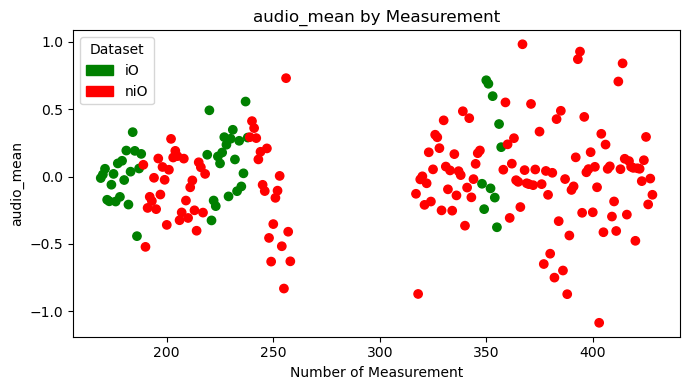

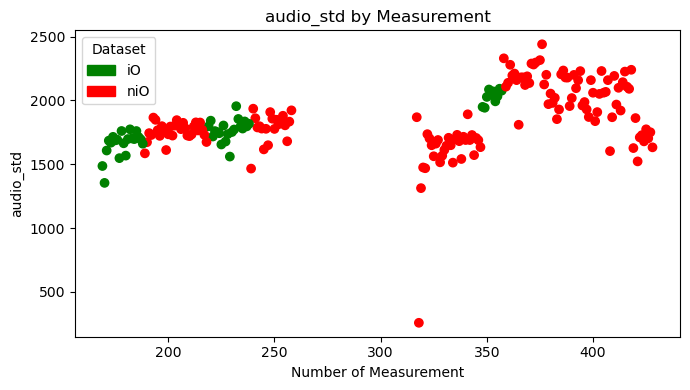

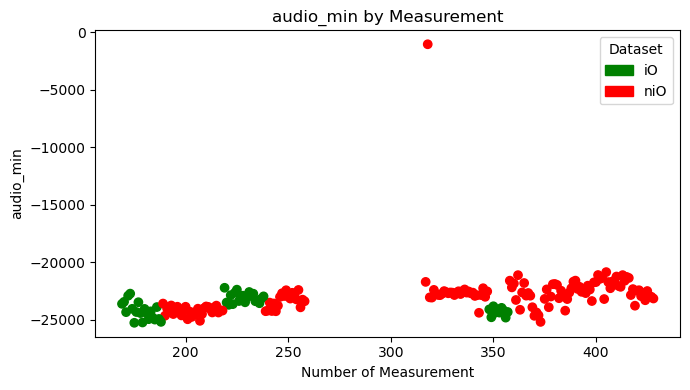

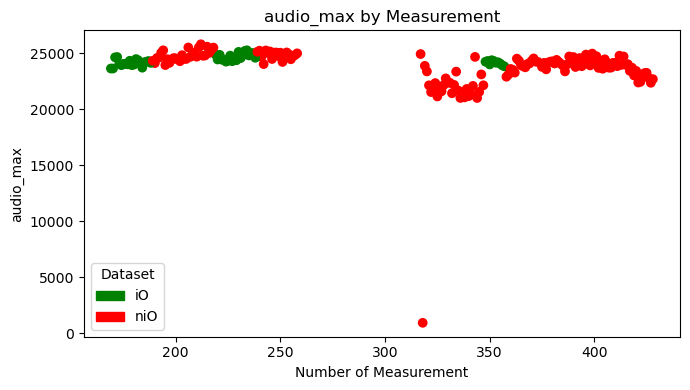

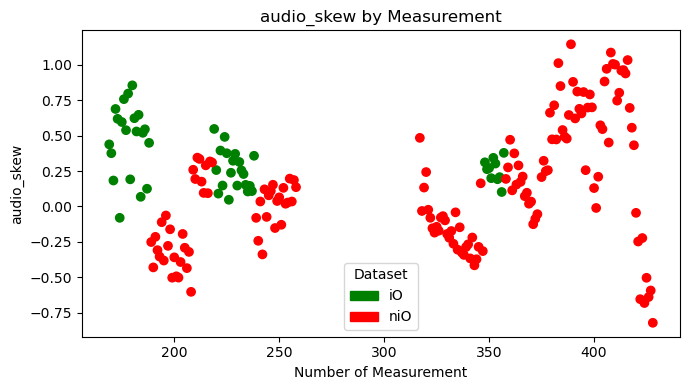

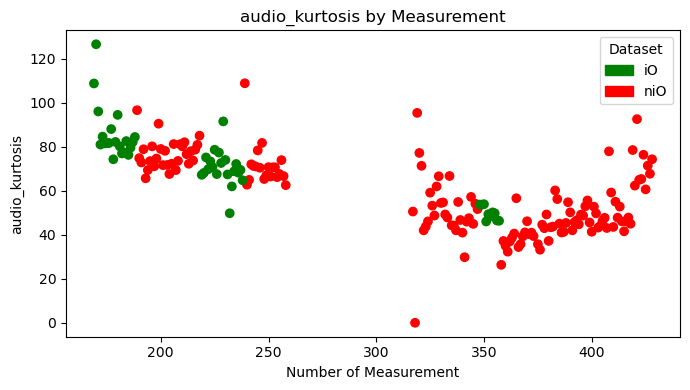

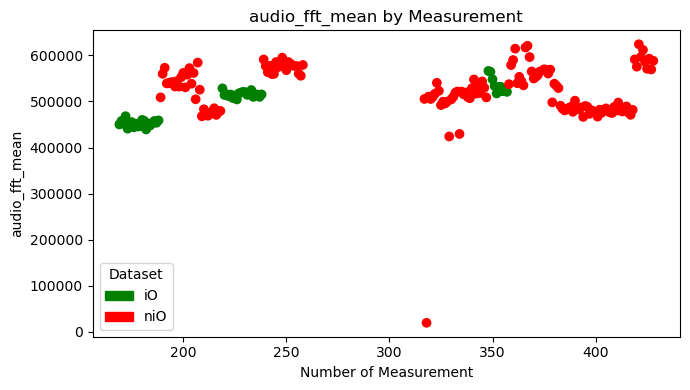

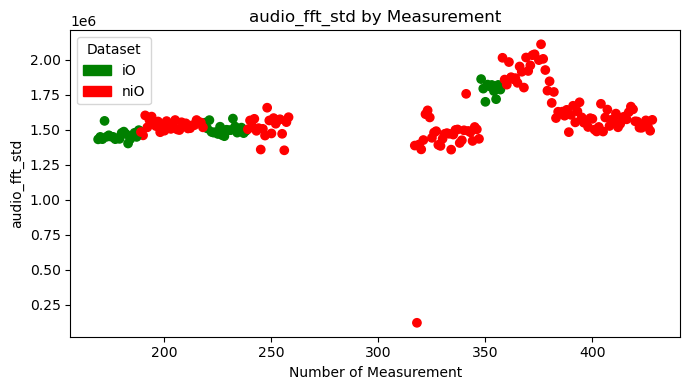

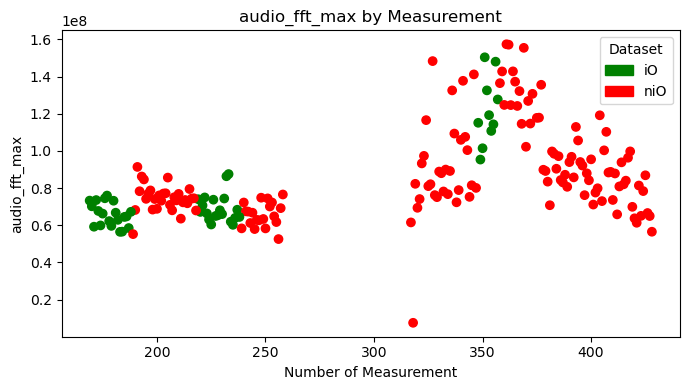

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.stats import skew, kurtosis

# === Feature Extraction Function ===
def extract_features(df):
    signal = df["M"].values
    features = {}

    # Basic Stats
    features['audio_mean'] = np.mean(signal)
    features['audio_std'] = np.std(signal)
    features['audio_min'] = np.min(signal)
    features['audio_max'] = np.max(signal)
    features['audio_skew'] = skew(signal)
    features['audio_kurtosis'] = kurtosis(signal)

    # Frequency Domain (FFT)
    fft = np.fft.fft(signal)
    fft_coeffs = np.abs(fft)[:len(fft)//2]  # Only positive frequencies
    features['audio_fft_mean'] = np.mean(fft_coeffs)
    features['audio_fft_std'] = np.std(fft_coeffs)
    features['audio_fft_max'] = np.max(fft_coeffs)

    return features

# === Feature Berechnung für alle Messungen ===
all_features = []
for df in list_Audio:
    feats = extract_features(df)
    all_features.append(feats)

df_features = pd.DataFrame(all_features)

# === IDs der Messungen anhängen ===
df_features['Number of Measurement'] = id_Audio

# === Merge mit iO/niO Label aus df_Usage ===
Audio_features_df = df_features.merge(df_Usage, on='Number of Measurement', how='left')
print(Audio_features_df.head())


# === Scatter-Plots für jedes Feature ===
feature_columns_audio = ['audio_mean', 'audio_std', 'audio_min', 'audio_max', 'audio_skew', 'audio_kurtosis', 'audio_fft_mean', 'audio_fft_std', 'audio_fft_max']

def plot_feature_scatter(df, feature):
    # === Farben für iO / niO ===
    color_map = {'iO': 'green', 'niO': 'red'}
    colors = df['Dataset'].map(color_map)

    plt.figure(figsize=(7, 4))
    plt.scatter(df['Number of Measurement'], df[feature], c=colors)
    plt.xlabel('Number of Measurement')
    plt.ylabel(feature)
    plt.legend(handles=[mpatches.Patch(color='green', label='iO'),
                        mpatches.Patch(color='red', label='niO')],
                        title='Dataset')
    plt.title(f'{feature} by Measurement')
    plt.tight_layout()
    plt.show()

for feature in feature_columns_audio:
    plot_feature_scatter(Audio_features_df, feature)

### Weldqas part

# read single file

file_path = os.path.join(Weldqas_path,"169.csv")
df = pd.read_csv(file_path)
#pd.set_option('display.max_rows', None)
print(df)
df.info()
x = df["Time"]
y = df["M"]
plt.plot(x,y)
plt.xlabel("Time (s)")
plt.ylabel("M ")


   current_mean  current_std  current_rms  voltage_mean  voltage_std  \
0    234.459297   164.622573   286.481680     18.723785    15.900515   
1    235.326876   166.547829   288.300049     18.285624    15.839548   
2    232.771091   165.063882   285.356735     18.709311    16.813434   
3    236.981904   166.098828   289.394616     28.953285    22.882034   
4    235.270502   166.463105   288.205091     18.995891    16.453277   

   voltage_rms  wire_speed_mean  wire_speed_std  Number of Measurement Dataset  
0    24.564334              0.0             0.0                    223      iO  
1    24.192051              0.0             0.0                    237      iO  
2    25.154122              0.0             0.0                    169      iO  
3    36.903661              0.0             0.0                    196     niO  
4    25.130742              0.0             0.0                    182      iO  


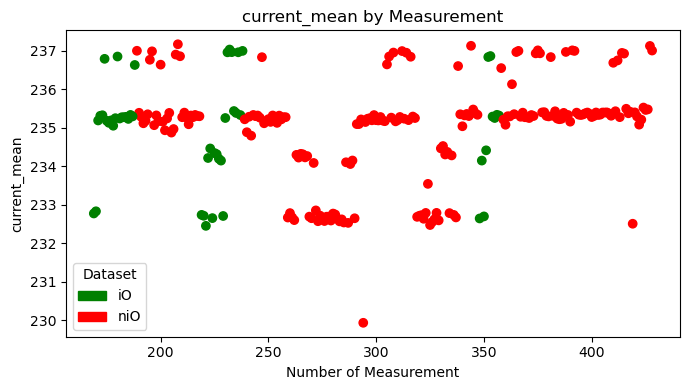

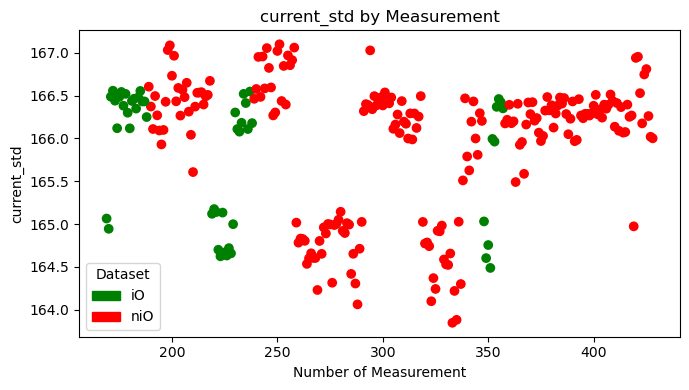

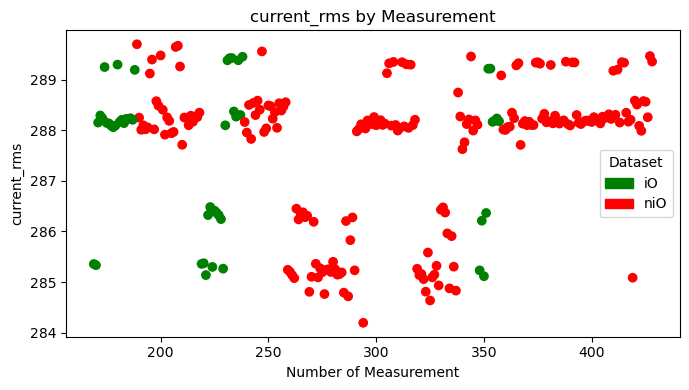

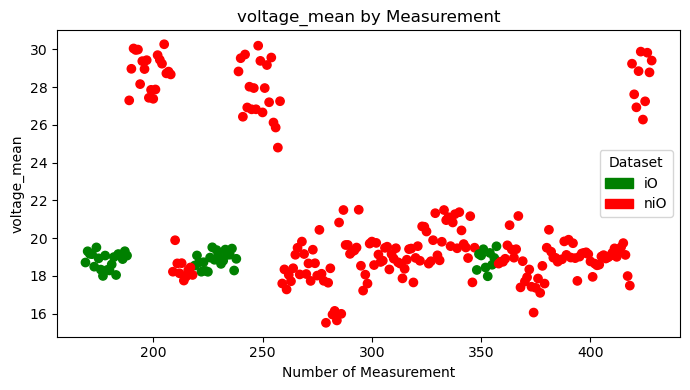

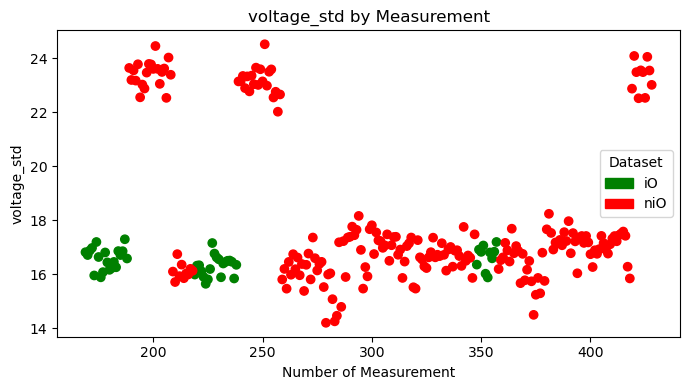

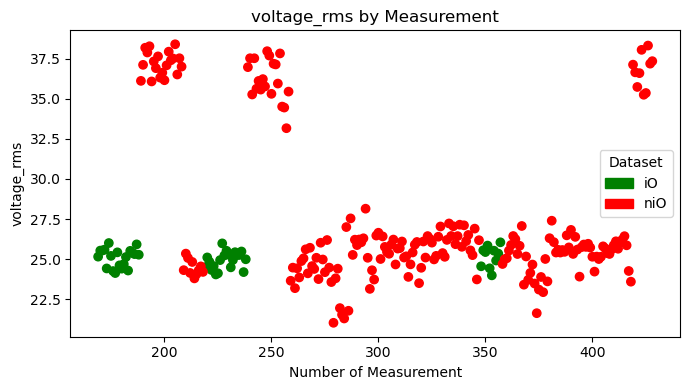

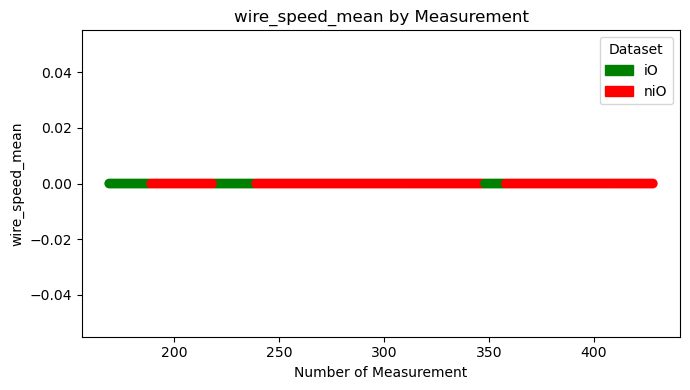

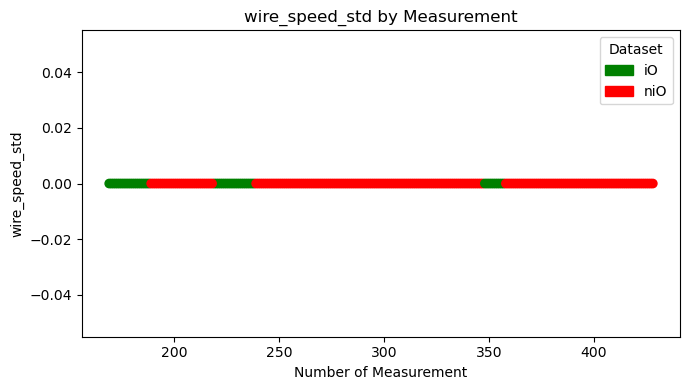

In [45]:

# Weldqas Feature Extraction 
def extract_weldqas_features(df):
    features = {}
    
    # Current
    current = df["Current [A]"].values
    features['current_mean'] = np.mean(current)
    features['current_std'] = np.std(current)
    features['current_rms'] = np.sqrt(np.mean(current**2))
    
    # Voltage
    voltage = df["Voltage [V]"].values
    features['voltage_mean'] = np.mean(voltage)
    features['voltage_std'] = np.std(voltage)
    features['voltage_rms'] = np.sqrt(np.mean(voltage**2))
    
    # Wire Speed
    wire_speed = df["Wire [m/min]"].values
    features['wire_speed_mean'] = np.mean(wire_speed)
    features['wire_speed_std'] = np.std(wire_speed)
    
    return features

# Feature calculation
all_weldqas_features = []
for df in list_Weldqas:
    feats = extract_weldqas_features(df)
    all_weldqas_features.append(feats)

df_weldqas_features = pd.DataFrame(all_weldqas_features)

# Messungs-IDs hinzufügen 
df_weldqas_features['Number of Measurement'] = id_weldqas

# Merge mit iO/niO Labels & Färben
Weldqas_features_df = df_weldqas_features.merge(df_Usage, on='Number of Measurement', how='left')
print(Weldqas_features_df.head())

# Scatter-Plots für alle Weldqas-Features
feature_columns_weldqas = [
    'current_mean', 'current_std', 'current_rms',
    'voltage_mean', 'voltage_std', 'voltage_rms',
    'wire_speed_mean', 'wire_speed_std'
]

for feature in feature_columns_weldqas:
    plot_feature_scatter(Weldqas_features_df, feature)


Analyse Featureset

Missing values in Audio features:
Audio features:
mean                     0
std                      0
min                      0
max                      0
skew                     0
kurtosis                 0
fft_mean                 0
fft_std                  0
fft_max                  0
Number of Measurement    0
Dataset                  0
dtype: int64
Weldqas features:
current_mean             0
current_std              0
current_rms              0
voltage_mean             0
voltage_std              0
voltage_rms              0
wire_speed_mean          0
wire_speed_std           0
Number of Measurement    0
Dataset                  0
dtype: int64


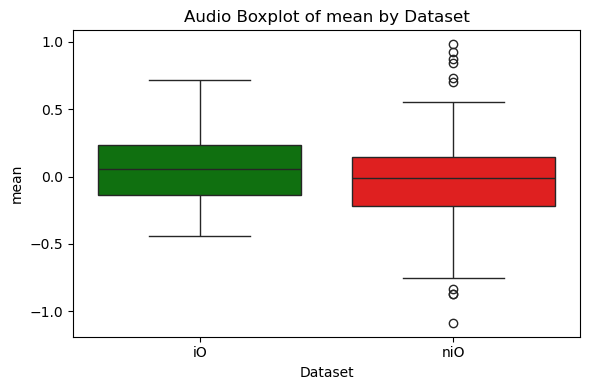

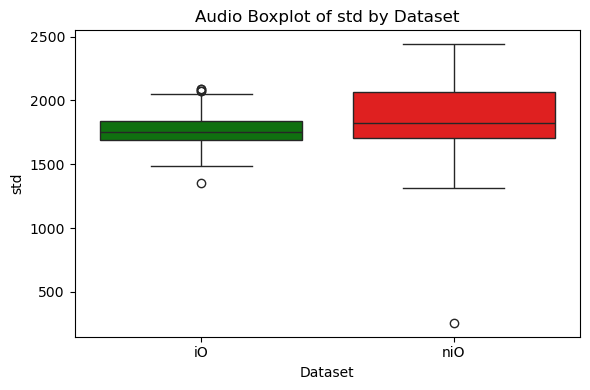

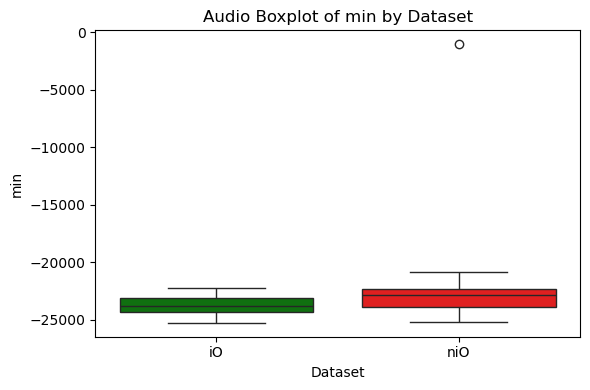

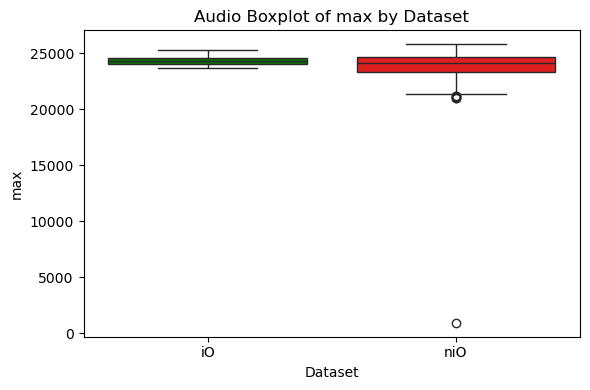

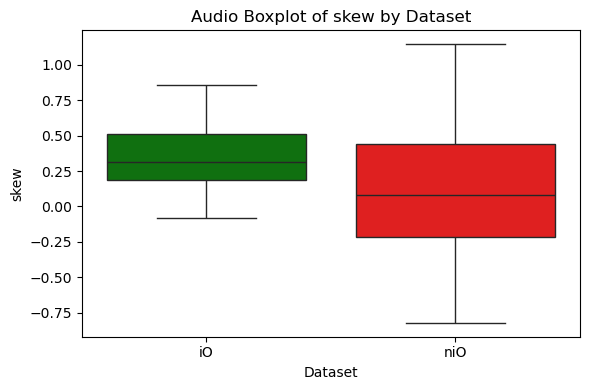

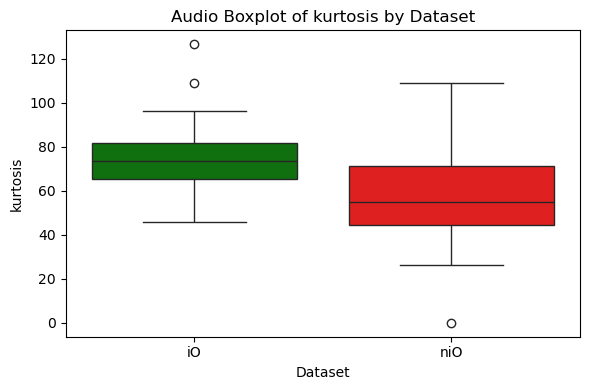

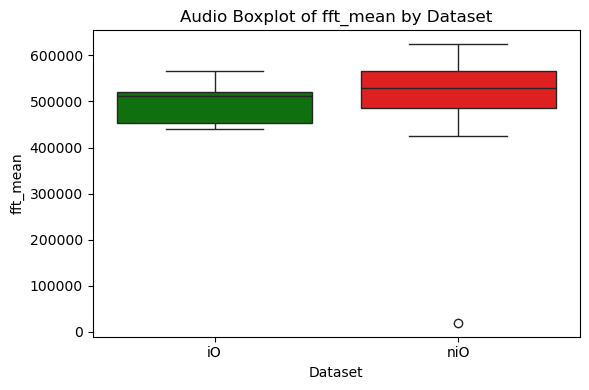

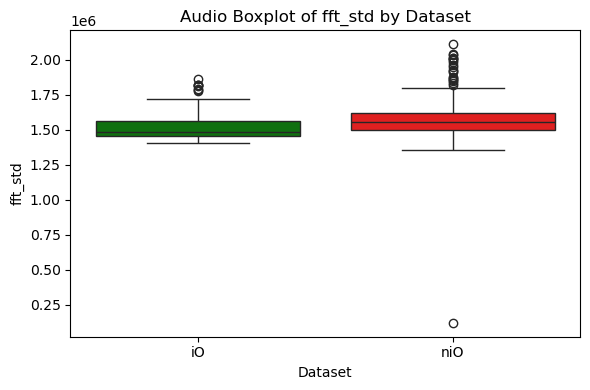

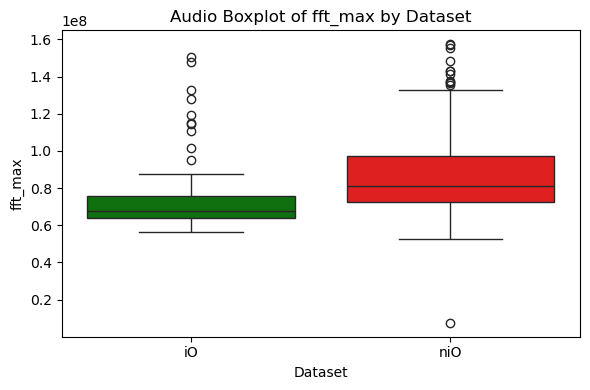

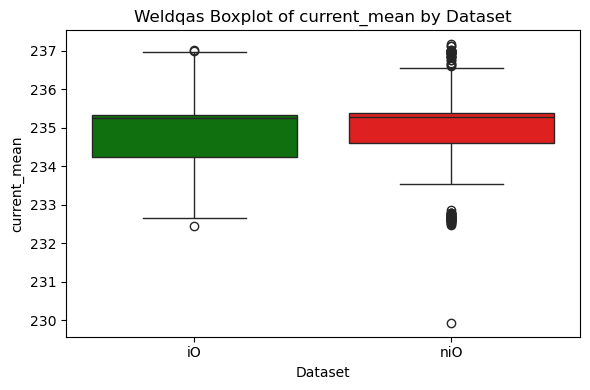

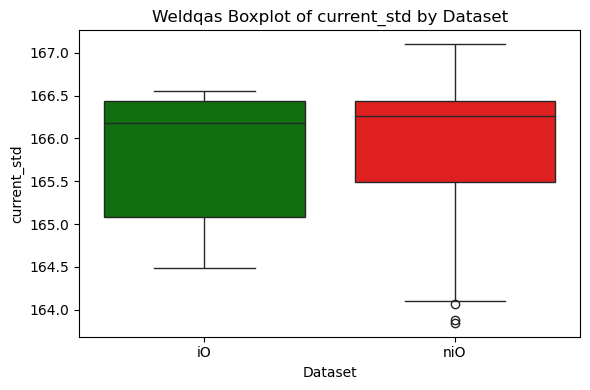

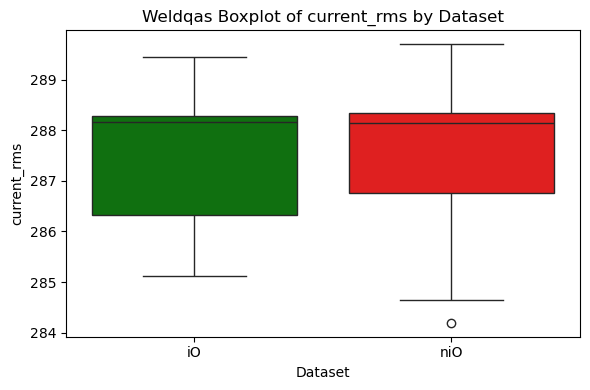

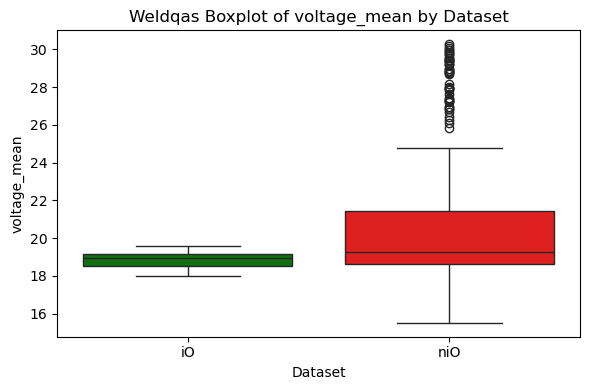

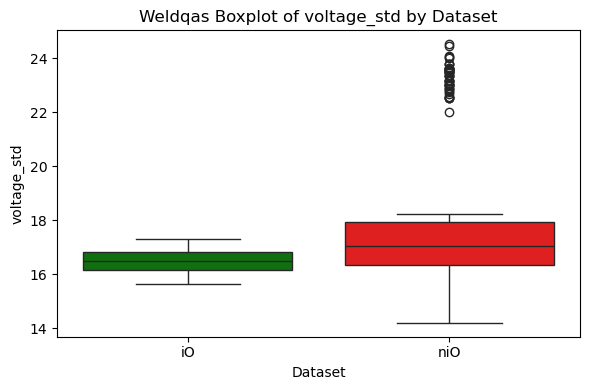

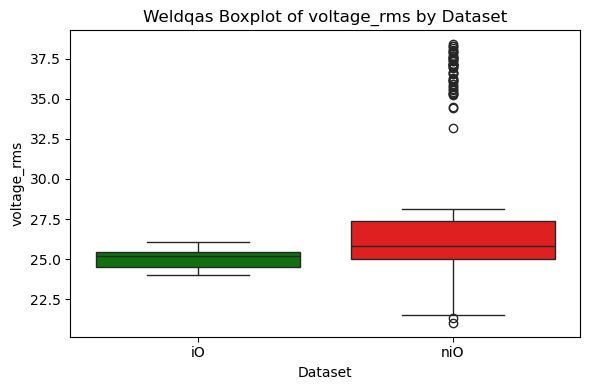

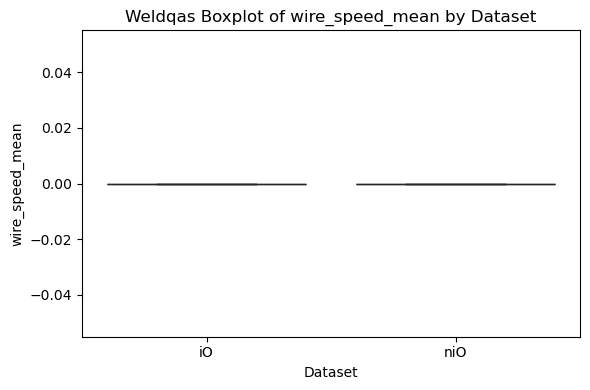

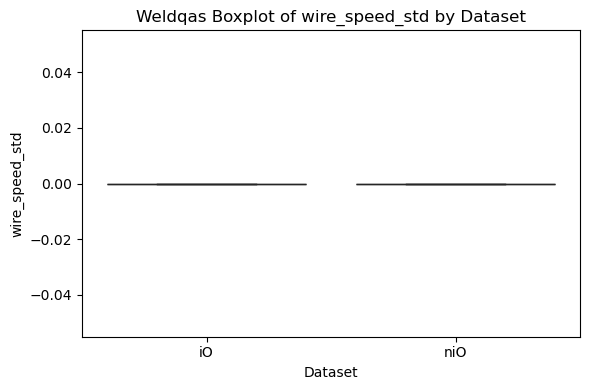


=== Outliers in Audio Features ===

Feature: mean
     Number of Measurement      mean Dataset
9                      394  0.927135     niO
33                     382 -0.750314     niO
54                     393  0.870521     niO
93                     255 -0.831382     niO
102                    256  0.729902     niO
118                    318 -0.871601     niO
137                    388 -0.873203     niO
177                    403 -1.085590     niO
190                    367  0.981397     niO
196                    414  0.839840     niO

Feature: std
     Number of Measurement         std Dataset
118                    318  257.260026     niO

Feature: min
     Number of Measurement   min Dataset
118                    318 -1043     niO

Feature: max
     Number of Measurement    max Dataset
14                     342  22091     niO
27                     340  21177     niO
37                     341  21371     niO
49                     345  21556     niO
57                     344

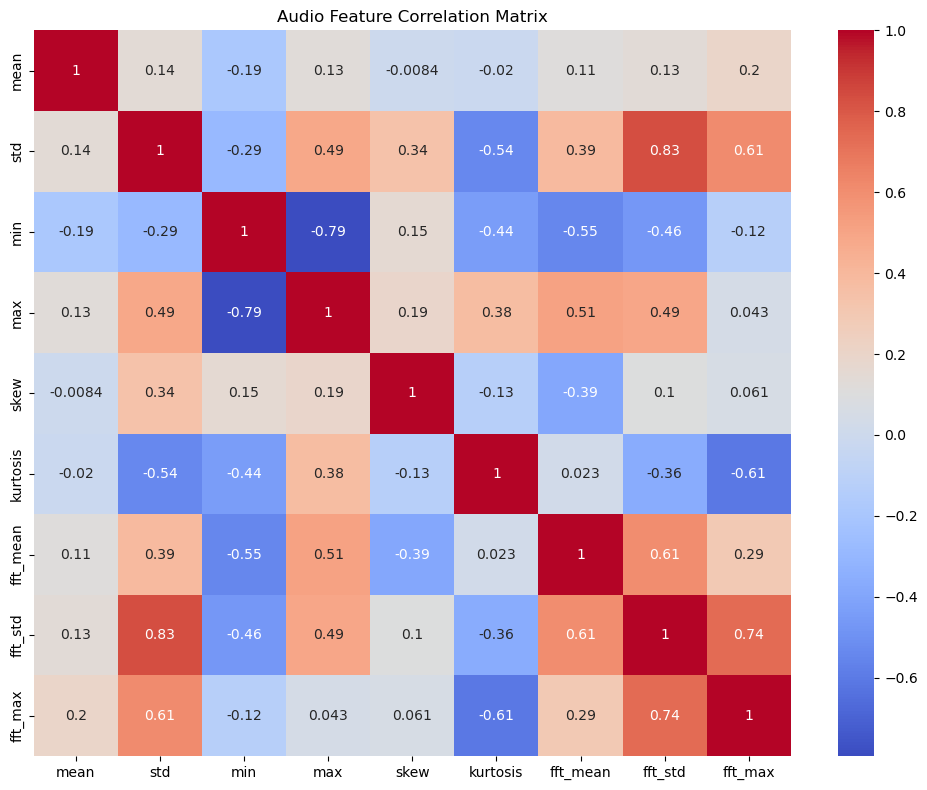

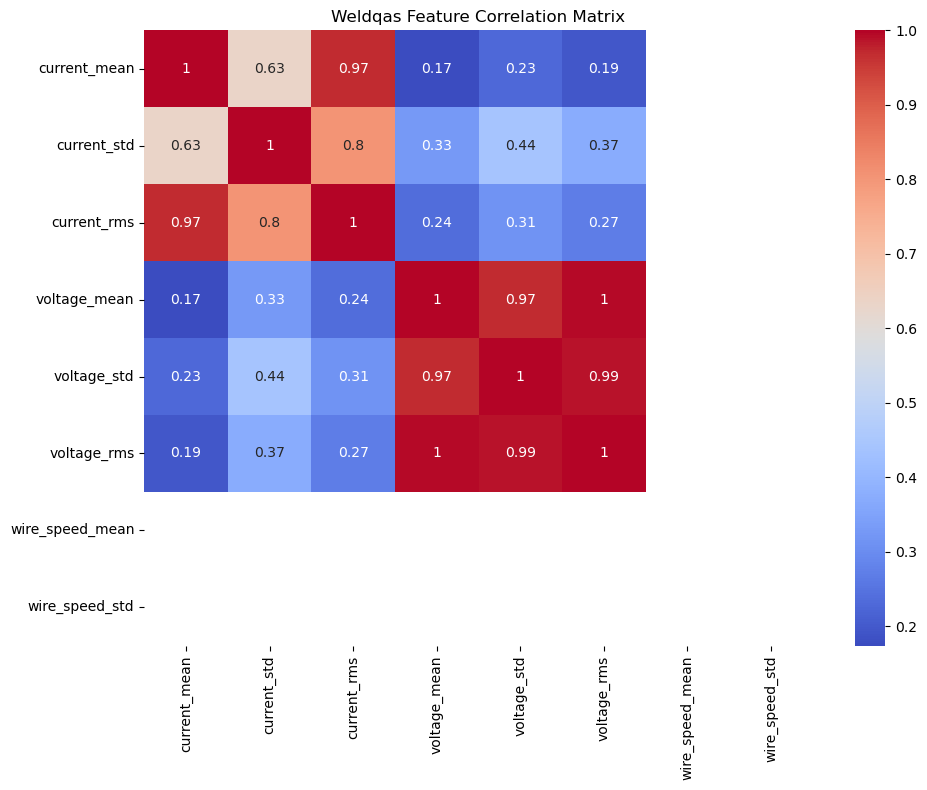

Cluster Based on Feature Presence:
has_audio_data  has_weld_data
False           True              59
True            True             201
dtype: int64


In [41]:
# Check for missing values
print("Missing values in Audio features:")
print("Audio features:")
print(Audio_features_df.isnull().sum())
print("Weldqas features:")
print(Weldqas_features_df.isnull().sum())

# check for outliers 
def check_outliers(features_df, feature_columns, name):
    for feature in feature_columns:  
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=features_df, x='Dataset', y=feature, hue='Dataset', palette=color_map, legend=False)
        plt.title(f'{name} Boxplot of {feature} by Dataset')
        plt.tight_layout()
        plt.show()
check_outliers(Audio_features_df, feature_columns_audio, 'Audio')
check_outliers(Weldqas_features_df,feature_columns_weldqas, 'Weldqas')

def print_outliers(features_df, feature_columns, name):
    print(f"\n=== Outliers in {name} Features ===")
    for feature in feature_columns:
        Q1 = features_df[feature].quantile(0.25)
        Q3 = features_df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = features_df[
            (features_df[feature] < lower_bound) |
            (features_df[feature] > upper_bound)
        ]

        if not outliers.empty:
            print(f"\nFeature: {feature}")
            print(outliers[['Number of Measurement', feature, 'Dataset']])
        else:
            print(f"\nFeature: {feature} - No outliers found.")
print_outliers(Audio_features_df, feature_columns_audio, 'Audio')
print_outliers(Weldqas_features_df, feature_columns_weldqas, 'Weldqas')

# correlation matrix
def plot_correlation_matrix(features_df, feature_columns, name):
    corr_matrix = features_df[feature_columns].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
    plt.title(f"{name} Feature Correlation Matrix")
    plt.tight_layout()
    plt.show()
plot_correlation_matrix(Audio_features_df, feature_columns_audio, 'Audio')
plot_correlation_matrix(Weldqas_features_df, feature_columns_weldqas, 'Weldqas')

general['has_audio_data'] = general['Number of Measurement'].isin(id_Audio)
general['has_weld_data'] = general['Number of Measurement'].isin(id_weldqas)
print("Cluster Based on Feature Presence:")
print(general.groupby(['has_audio_data', 'has_weld_data']).size())



Feature Engineering

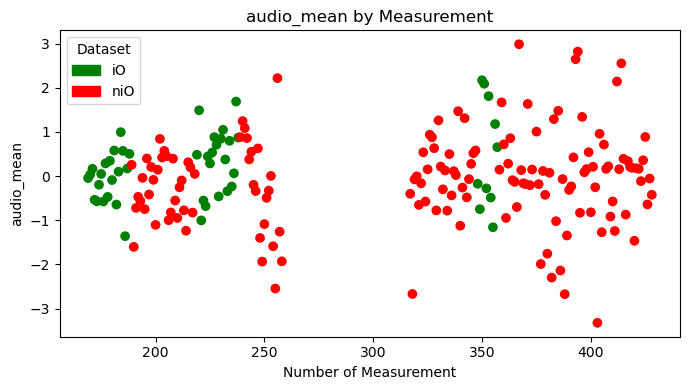

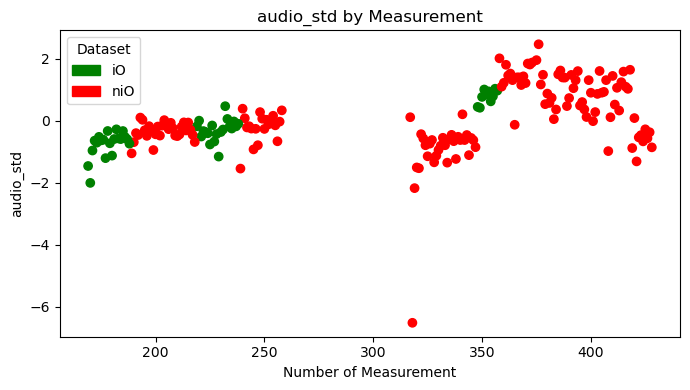

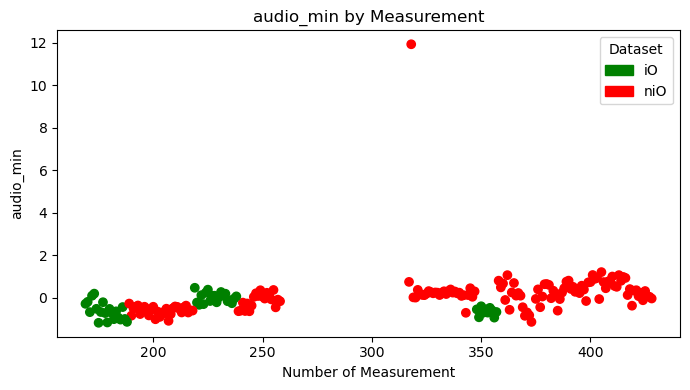

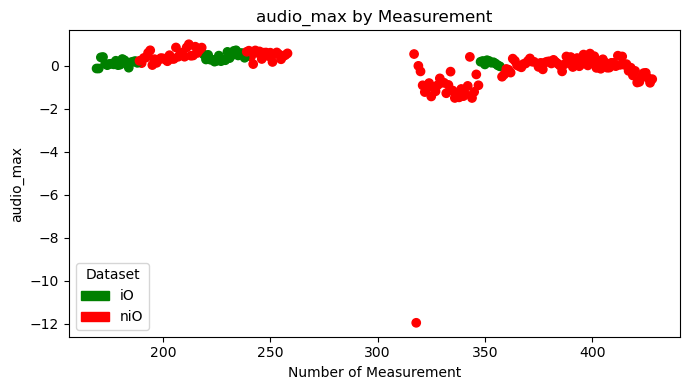

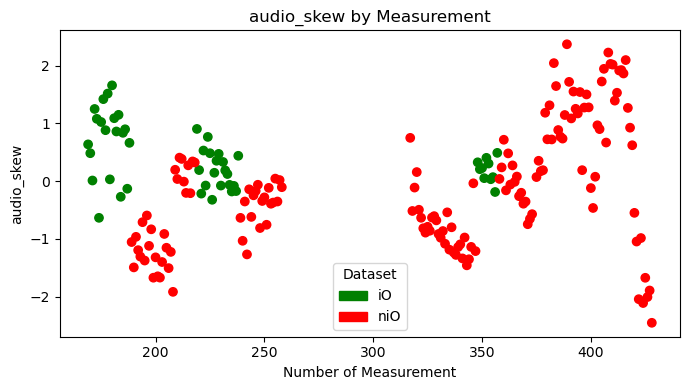

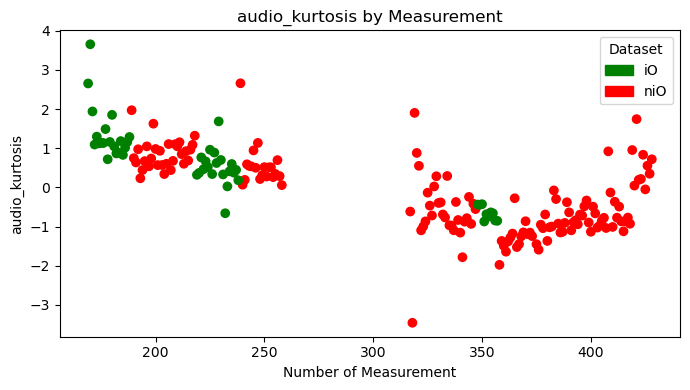

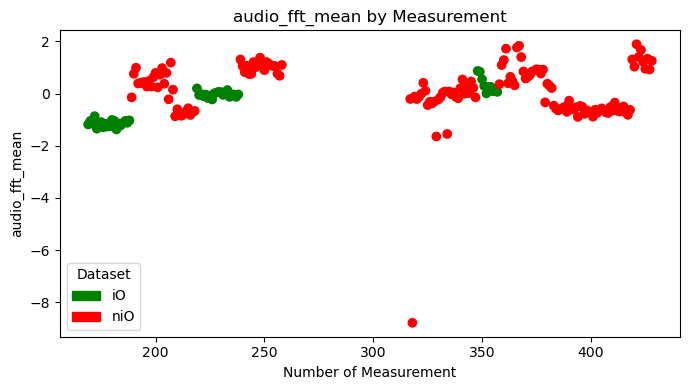

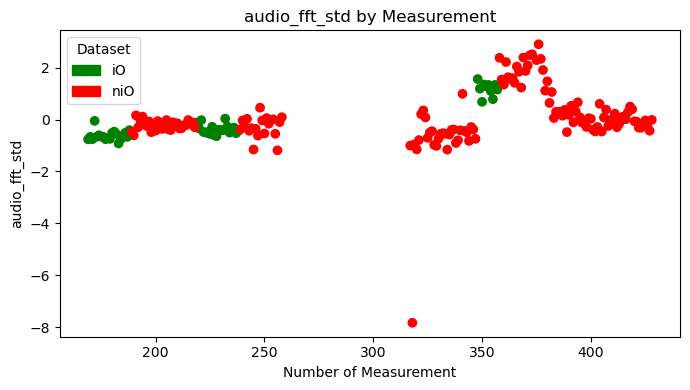

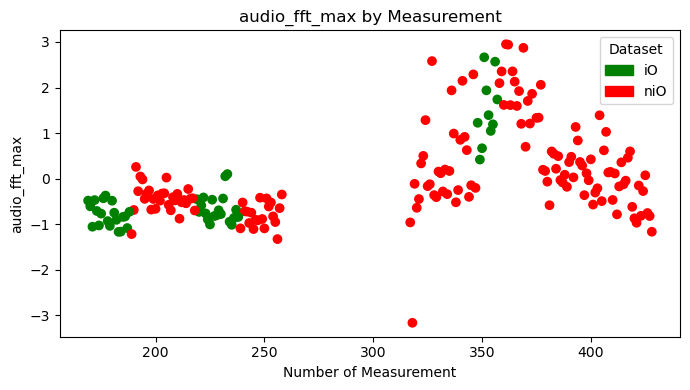

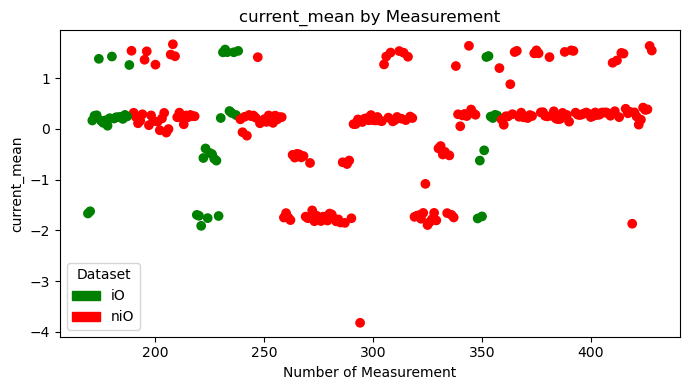

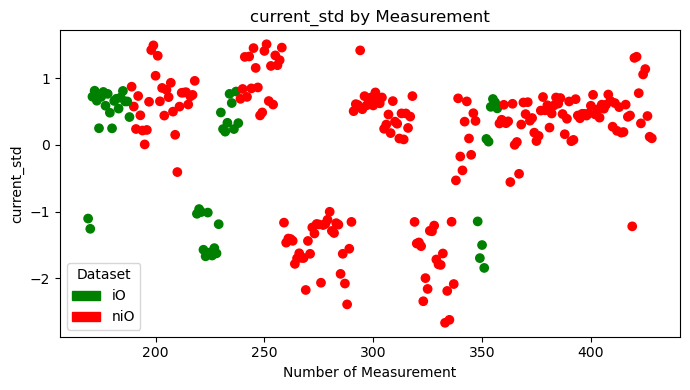

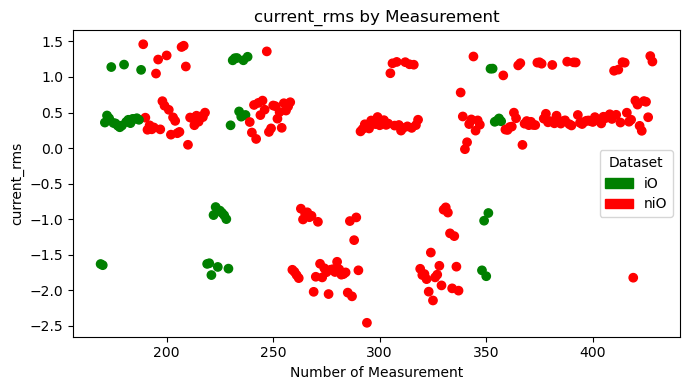

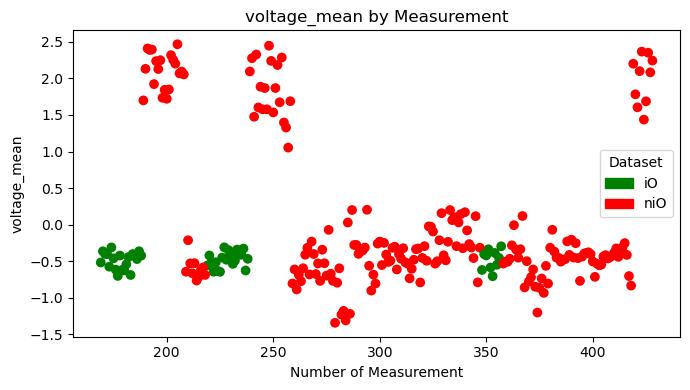

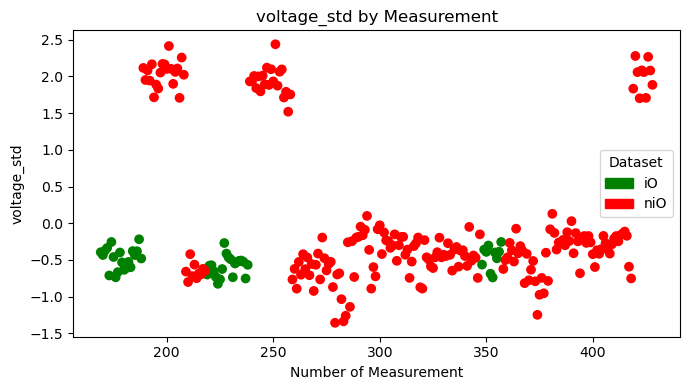

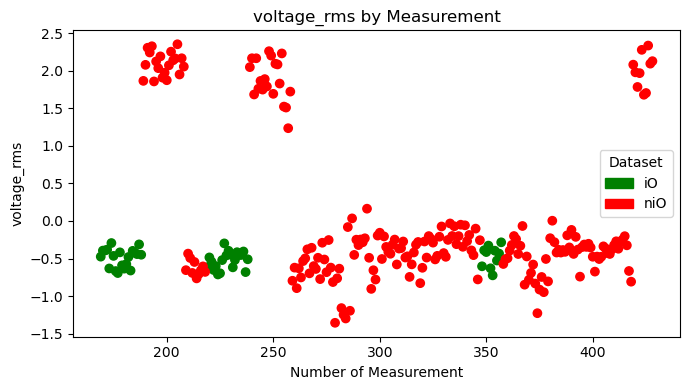

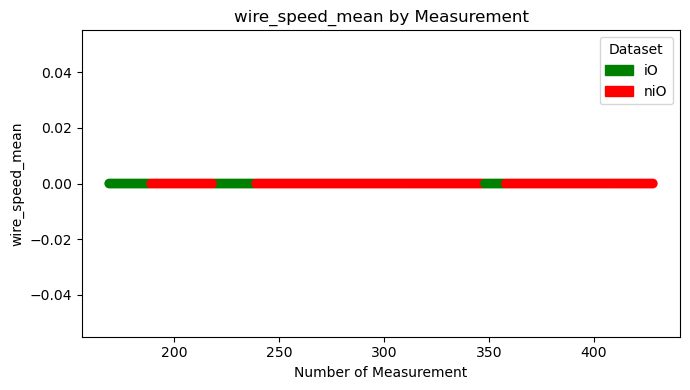

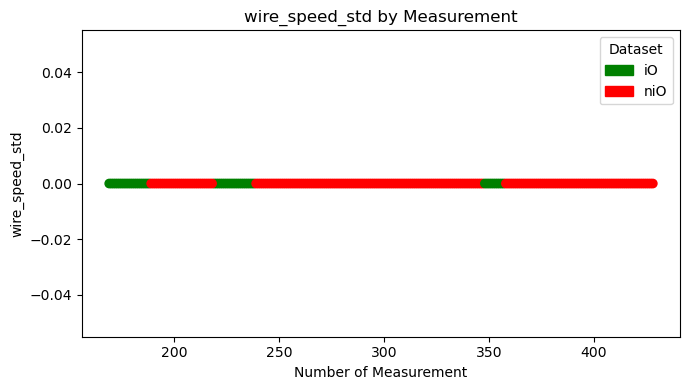

In [50]:
#Feature normalization
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def normalize_features(features_df, feature_columns):
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features_df[feature_columns])
    scaled_df = pd.DataFrame(scaled_features, columns=feature_columns)
    scaled_df['Dataset'] = features_df['Dataset'].values
    scaled_df['Number of Measurement'] = features_df['Number of Measurement'].values
    return scaled_df
Audio_features_scaled = normalize_features(Audio_features_df, feature_columns_audio)
Weldqas_features_scaled = normalize_features(Weldqas_features_df, feature_columns_weldqas)

for feature in feature_columns_audio:
    plot_feature_scatter(Audio_features_scaled, feature)
for feature in feature_columns_weldqas:
    plot_feature_scatter(Weldqas_features_scaled, feature)
